## İngiltere Trafik Kazaları Analizi (2000–2016)

Problem Tanımı ve Projenin Amacı

Bu çalışma, 2000-2016 yılları arasında İngiltere, İskoçya ve Galler’de meydana gelen trafik kazalarına ilişkin verileri analiz ederek önemli içgörüler elde etmeyi amaçlamaktadır. Toplamda 1,6 milyondan fazla olaya ait polis kayıtları ve trafik yoğunluğu verileri temel alınmıştır. Projede aşağıdaki hedeflere odaklanılmıştır:

Kaza oranlarını etkileyen temel çevresel ve yapısal faktörleri belirlemek,

Şehir içi ve kırsal bölgeler arasında kaza desenlerini karşılaştırmak,

Trafik yoğunluğundaki değişimlerin kaza sıklığına olan etkisini incelemek,

Farklı bölgeler (İngiltere, İskoçya, Galler) arasındaki trafik güvenliği farklarını ortaya koymak,

Gelecekteki kazaları öngörebilecek tahmin modelleri oluşturmak.

In [1]:
# Gerekli kütüphaleri yükleyelim

import pandas as pd        # Veri okuma ve işleme
import numpy as np         # Sayısal işlemler
import matplotlib.pyplot as plt  # Grafik çizimi
import seaborn as sns      # İstatistiksel grafikler

In [2]:
# Verisetini yükleme

df_traffic = pd.read_csv('ukTrafficAADF.csv')                     # Trafik yoğunluğu verisini yükle
acc_1 = pd.read_csv('accidents_2005_to_2007.csv', low_memory=False)  # 2005-2007 kaza verilerini yükle
acc_2 = pd.read_csv('accidents_2009_to_2011.csv', low_memory=False)  # 2009-2011 kaza verilerini yükle
acc_3 = pd.read_csv('accidents_2012_to_2014.csv', low_memory=False)  # 2012-2014 kaza verilerini yükle

# Veri setlerini birleştirme
df_accidents = pd.concat([acc_1, acc_2, acc_3], ignore_index=True)  # Üç veri setini tek bir DataFrame’de birleştir


In [3]:
# Detaylı bilgileri getirelim

df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275385 entries, 0 to 275384
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AADFYear                    275385 non-null  int64  
 1   CP                          275385 non-null  int64  
 2   Estimation_method           237812 non-null  object 
 3   Estimation_method_detailed  237812 non-null  object 
 4   Region                      275385 non-null  object 
 5   LocalAuthority              275385 non-null  object 
 6   Road                        275385 non-null  object 
 7   RoadCategory                275385 non-null  object 
 8   Easting                     275385 non-null  int64  
 9   Northing                    275385 non-null  int64  
 10  StartJunction               275129 non-null  object 
 11  EndJunction                 275147 non-null  object 
 12  LinkLength_km               275385 non-null  float64
 13  LinkLength_mil

In [4]:
# Boyut bilgisi

df_traffic.shape

(275385, 29)

In [5]:
# Kazaların detayları

df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1

In [6]:
# boyut bilgisi

df_accidents.shape

(1504150, 33)

In [7]:
# Tarihin değişken tipini çevirme

df_accidents['Date'] = pd.to_datetime(df_accidents['Date'], errors='coerce')  # 'Date' sütununu tarih (datetime) tipine çevir
df_accidents['Year'] = df_accidents['Date'].dt.year  # 'Date' sütunundan yılı alıp yeni bir 'Year' sütunu oluştur

In [8]:
# Eksik veri analizi

df_traffic.isnull().sum()

AADFYear                          0
CP                                0
Estimation_method             37573
Estimation_method_detailed    37573
Region                            0
LocalAuthority                    0
Road                              0
RoadCategory                      0
Easting                           0
Northing                          0
StartJunction                   256
EndJunction                     238
LinkLength_km                     0
LinkLength_miles                  0
PedalCycles                       0
Motorcycles                       0
CarsTaxis                         0
BusesCoaches                      0
LightGoodsVehicles                0
V2AxleRigidHGV                    0
V3AxleRigidHGV                    0
V4or5AxleRigidHGV                 0
V3or4AxleArticHGV                 0
V5AxleArticHGV                    0
V6orMoreAxleArticHGV              0
AllHGVs                           0
AllMotorVehicles                  0
Lat                         

In [9]:
# Eksik veri analizi

df_accidents.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                            905588
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [10]:
# sütunları getirme

df_accidents.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [11]:
# sütunları getirme

df_traffic.columns

Index(['AADFYear', 'CP', 'Estimation_method', 'Estimation_method_detailed',
       'Region', 'LocalAuthority', 'Road', 'RoadCategory', 'Easting',
       'Northing', 'StartJunction', 'EndJunction', 'LinkLength_km',
       'LinkLength_miles', 'PedalCycles', 'Motorcycles', 'CarsTaxis',
       'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles',
       'Lat', 'Lon'],
      dtype='object')

In [12]:
# Gerekli sütunları seçerek yeni bir veri çerçevesi oluşturma

df_accidents = df_accidents.loc[:, [  
    "Accident_Severity",              # Kazanın ciddiyeti (ölümcül, ciddi, hafif)
    "Number_of_Casualties",          # Yaralanan veya hayatını kaybeden kişi sayısı
    "Day_of_Week",                   # Haftanın günü
    "Date",                          # Kaza tarihi
    "Time",                          # Kaza saati
    "Local_Authority_(District)",    # Yerel yönetim (ilçe düzeyi)
    "Local_Authority_(Highway)",     # Yerel yönetim (karayolu düzeyi)
    "Road_Type",                     # Yol türü (şehir içi, kırsal vb.)
    "Speed_limit",                   # Hız sınırı
    "Light_Conditions",              # Aydınlatma durumu (gündüz, gece vb.)
    "Weather_Conditions",            # Hava durumu
    "Road_Surface_Conditions",       # Yol yüzeyi durumu (kuru, ıslak vb.)
    "Year"                           # Kaza yılı
]]

In [13]:
# eksik veri kontrolü

df_accidents.isnull().sum()

Accident_Severity                  0
Number_of_Casualties               0
Day_of_Week                        0
Date                          905588
Time                             117
Local_Authority_(District)         0
Local_Authority_(Highway)          0
Road_Type                          0
Speed_limit                        0
Light_Conditions                   0
Weather_Conditions               126
Road_Surface_Conditions         1958
Year                          905588
dtype: int64

In [14]:
df_accidents = df_accidents.dropna()   # Eksik (NaN) verileri içeren satırları veri setinden kaldır
df_accidents.shape                     # Kalan satır ve sütun sayısını göster (satır, sütun)

(597669, 13)

In [15]:
import datetime as dt            # Tarih ve zaman işlemleri için
import warnings                 # Uyarıları kontrol etmek için
warnings.filterwarnings('ignore')  # Uyarı mesajlarını gizle

# 'Time' sütununda boş (NaN) olan satırların indekslerini seç
selRows = df_accidents[df_accidents['Time'].isna()].index

# Bu satırları veri setinden kaldır
df_accidents = df_accidents.drop(selRows, axis=0)

# 'Time' sütununu saat:dakika formatında datetime tipine çevir
df_accidents["Time"] = pd.to_datetime(df_accidents["Time"], format='%H:%M')

# 'Time' sütunundan sadece saat bilgisini alıp yeni 'Hour' sütunu oluştur
df_accidents["Hour"] = df_accidents["Time"].dt.hour

# 'Date' sütunundan ay bilgisini alıp yeni 'Month' sütunu oluştur
df_accidents["Month"] = pd.DatetimeIndex(df_accidents["Date"]).month


**Hıza Göre Kaza Sayısı**

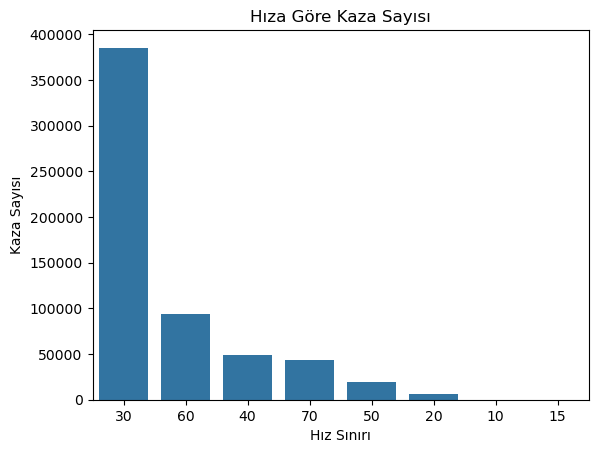

In [16]:
# Hız sınırı sütununu string (metin) tipe çevir
df_accidents.Speed_limit = df_accidents.Speed_limit.astype(str)

# Hız sınırına göre gruplandır
speed_sayisi = df_accidents.groupby("Speed_limit")

# Her hız sınırı için kaza sayısını hesapla ve azalan sıraya göre sırala
toplam_speed = pd.DataFrame(speed_sayisi.size().sort_values(ascending=False), columns=["Speed_limit_toplam"])

# Hız sınırına göre kaza sayısını çubuk grafik ile göster
sns.barplot(y=toplam_speed["Speed_limit_toplam"], x=toplam_speed.index)
plt.title("Hıza Göre Kaza Sayısı")
plt.xlabel("Hız Sınırı")
plt.ylabel("Kaza Sayısı")
plt.show()

**Yıllara Göre Kaza Sayısı**

In [17]:
# 'Year' sütununu metin (string) tipe çevir
df_accidents.Year = df_accidents.Year.astype(str)

# Yıla göre kazaları gruplandır
accidents = df_accidents.groupby("Year")

In [18]:
# Yıllara göre kaza sayısını hesapla ve azalan sırada sırala, DataFrame’e dönüştür
total_accidents = pd.DataFrame(accidents.size().sort_values(ascending=False), columns=["Sayı"])

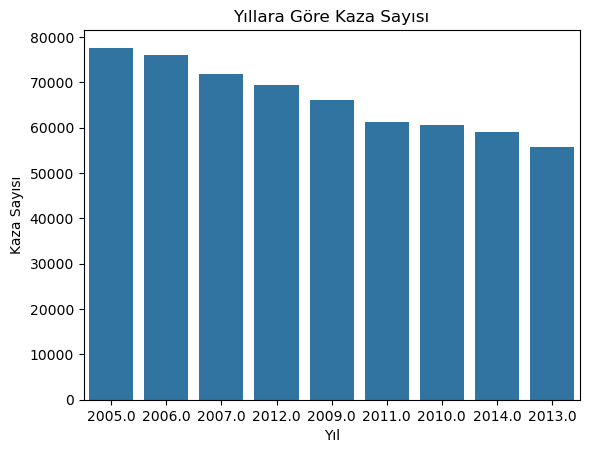

In [19]:
# Yıllara göre kaza sayısını çubuk grafik ile göster
sns.barplot(y=total_accidents["Sayı"], x=total_accidents.index)
plt.title("Yıllara Göre Kaza Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Kaza Sayısı")
plt.show()

In [20]:
# Saat ve ay sütunlarını metin (string) tipe çevir
df_accidents.Hour = df_accidents.Hour.astype(str)
df_accidents.Month = df_accidents.Month.astype(str)

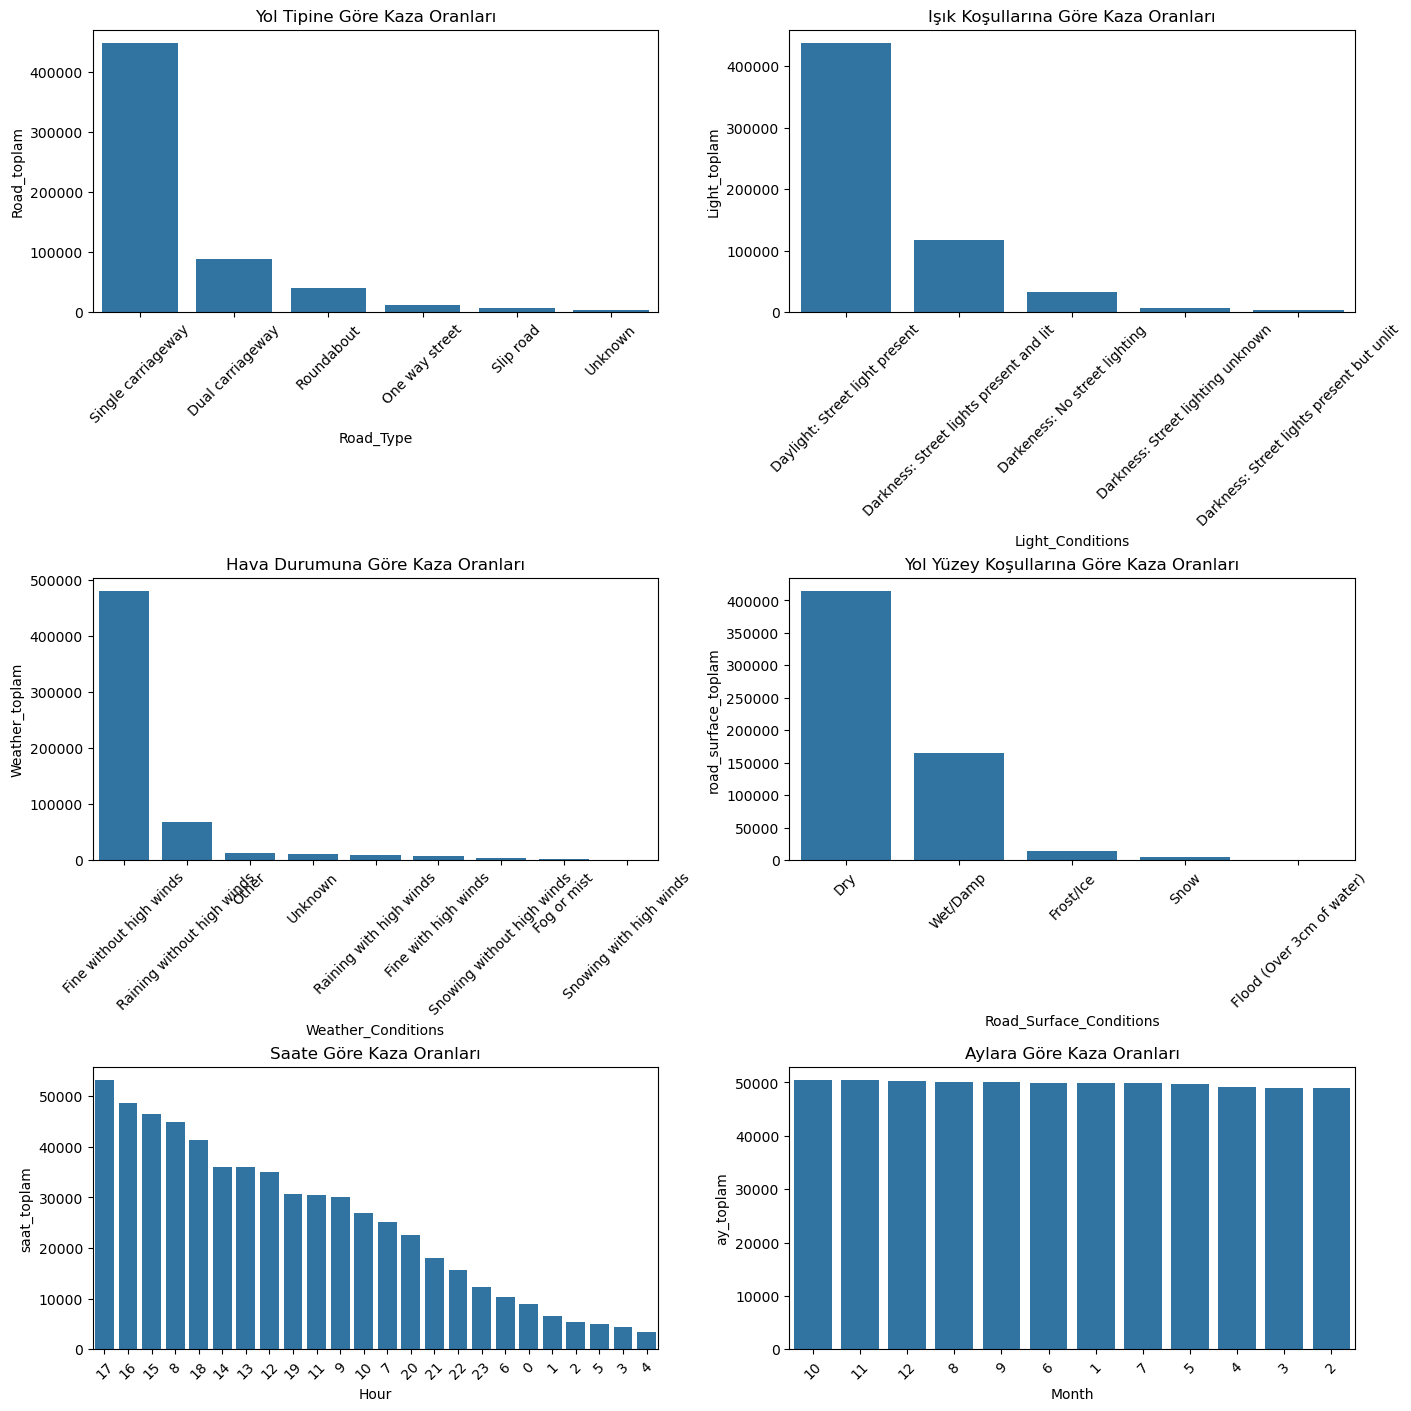

In [21]:
# 3 satır, 2 sütundan oluşan alt grafik alanı oluştur (toplam 6 grafik), boyut 14x14 inch
f, axs = plt.subplots(3, 2, figsize=(14, 14), constrained_layout=True)

# Yol tipine göre kazaları grupla ve say
road_sayisi = df_accidents.groupby("Road_Type")
toplam_road = pd.DataFrame(road_sayisi.size().sort_values(ascending=False), columns=["Road_toplam"])

# Işık koşullarına göre kazaları grupla ve say
light_sayisi = df_accidents.groupby("Light_Conditions")
toplam_light = pd.DataFrame(light_sayisi.size().sort_values(ascending=False), columns=["Light_toplam"])

# Hava durumuna göre kazaları grupla ve say
weather_sayisi = df_accidents.groupby("Weather_Conditions")
toplam_weather = pd.DataFrame(weather_sayisi.size().sort_values(ascending=False), columns=["Weather_toplam"])

# Yol yüzey koşullarına göre kazaları grupla ve say
surface_sayisi = df_accidents.groupby("Road_Surface_Conditions")
toplam_surface = pd.DataFrame(surface_sayisi.size().sort_values(ascending=False), columns=["road_surface_toplam"])

# Saat bazında kazaları grupla ve say
saat_sayisi = df_accidents.groupby("Hour")
toplam_saat = pd.DataFrame(saat_sayisi.size().sort_values(ascending=False), columns=["saat_toplam"])

# Ay bazında kazaları grupla ve say
ay_sayisi = df_accidents.groupby("Month")
toplam_ay = pd.DataFrame(ay_sayisi.size().sort_values(ascending=False), columns=["ay_toplam"])

# Her bir alt grafik için barplot çizimi ve x ekseni etiketlerini 45 derece döndürme
ax = sns.barplot(x=toplam_road.index, y=toplam_road["Road_toplam"], data=toplam_road, ax=axs[0, 0])
ax.tick_params(axis='x', rotation=45)

ax = sns.barplot(x=toplam_light.index, y=toplam_light["Light_toplam"], data=toplam_light, ax=axs[0, 1])
ax.tick_params(axis='x', rotation=45)

ax = sns.barplot(x=toplam_weather.index, y=toplam_weather["Weather_toplam"], data=toplam_weather, ax=axs[1, 0])
ax.tick_params(axis='x', rotation=45)

ax = sns.barplot(x=toplam_surface.index, y=toplam_surface["road_surface_toplam"], data=toplam_surface, ax=axs[1, 1])
ax.tick_params(axis='x', rotation=45)

ax = sns.barplot(x=toplam_saat.index, y=toplam_saat["saat_toplam"], data=toplam_saat, ax=axs[2, 0])
ax.tick_params(axis='x', rotation=45)

ax = sns.barplot(x=toplam_ay.index, y=toplam_ay["ay_toplam"], data=toplam_ay, ax=axs[2, 1])
ax.tick_params(axis='x', rotation=45)

# Alt grafik başlıklarını ayarla
axs[0, 0].title.set_text('Yol Tipine Göre Kaza Oranları')
axs[0, 1].title.set_text('Işık Koşullarına Göre Kaza Oranları')
axs[1, 0].title.set_text('Hava Durumuna Göre Kaza Oranları')
axs[1, 1].title.set_text('Yol Yüzey Koşullarına Göre Kaza Oranları')
axs[2, 0].title.set_text('Saate Göre Kaza Oranları')
axs[2, 1].title.set_text('Aylara Göre Kaza Oranları')


In [22]:
yearly_accidents = df_accidents['Year'].value_counts().sort_index()

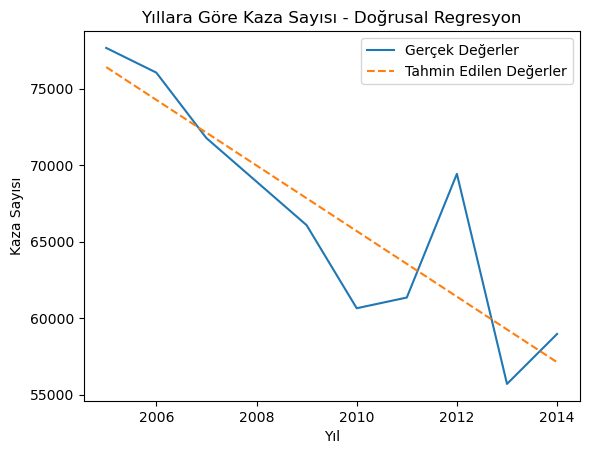

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Yıl indeksini önce float, sonra int yap ve NumPy array'e çevir
X = np.array(yearly_accidents.index.astype(float).astype(int)).reshape(-1, 1)
y = yearly_accidents.values

# Modeli oluştur ve eğit
model = LinearRegression()
model.fit(X, y)

# Tahmin yap
tahminler = model.predict(X)

# Grafik çiz
plt.plot(X, y, label='Gerçek Değerler')
plt.plot(X, tahminler, label='Tahmin Edilen Değerler', linestyle='--')
plt.title("Yıllara Göre Kaza Sayısı - Doğrusal Regresyon")
plt.xlabel("Yıl")
plt.ylabel("Kaza Sayısı")
plt.legend()
plt.show()